Load and Filter 2W Data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset(National wide data)
df = pd.read_csv(r"D:\Internship\fynne lab\ev_motor\EV_Vehicle_Market_India\Data_Collection\vegicle_types\ev_sales_by_category_2018_2023.csv")

# Preview data
print("📄 Columns:", df.columns)
print(df.head())


📄 Columns: Index(['Sl. No.', 'Vehicle Category', '2018 - Total', '2018 - EV', '2018 - %',
       '2019 - Total', '2019 - EV', '2019 - %', '2020 - Total', '2020 - EV',
       '2020 - %', '2021 - Total', '2021 - EV', '2021 - %', '2022 - Total',
       '2022 - EV', '2022 - %', '2023 (Till 01-08-2023) - Total',
       '2023 (Till 01-08-2023) - EV', '2023 (Till 01-08-2023) - %'],
      dtype='object')
   Sl. No.        Vehicle Category  2018 - Total  2018 - EV  2018 - %  \
0        1             Two Wheeler      19576235      17067      0.09   
1        2           Three Wheeler        764806     110133     14.40   
2        3            Four Wheeler       2999288       1047      0.03   
3        4          Goods Vehicles        886047        658      0.07   
4        5  Public Service Vehicle         79317         50      0.06   

   2019 - Total  2019 - EV  2019 - %  2020 - Total  2020 - EV  2020 - %  \
0      18644700      30389      0.16      14305129      29113      0.20   
1        76

Filter for Two-Wheelers (2W)

In [12]:
# Filter for 2W data (make sure it's being picked correctly)
df_2w = df[df["Vehicle Category"].str.contains("Two Wheeler", case=False)].copy()

# Manually construct EV sales data per year
ev_sales_2w = {
    "2018": df_2w["2018 - EV"].sum(),
    "2019": df_2w["2019 - EV"].sum(),
    "2020": df_2w["2020 - EV"].sum(),
    "2021": df_2w["2021 - EV"].sum(),
    "2022": df_2w["2022 - EV"].sum(),
    "2023": df_2w["2023 (Till 01-08-2023) - EV"].sum()
}

# Print the extracted values
print("\n📊 2W EV Yearly Sales Summary:")
for year, val in ev_sales_2w.items():
    print(f"{year}: {val}")

# Convert to DataFrame
ev_2w_yearly = pd.DataFrame(list(ev_sales_2w.items()), columns=["Year", "EV Registrations"])


📊 2W EV Yearly Sales Summary:
2018: 17067
2019: 30389
2020: 29113
2021: 156243
2022: 631181
2023: 489637


 1.National Plot 2W Sales Trend(2018-2023)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29396\1998244328.py:6: UserWarning: Glyph 128757 (\N{MOTOR SCOOTER}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128757 (\N{MOTOR SCOOTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


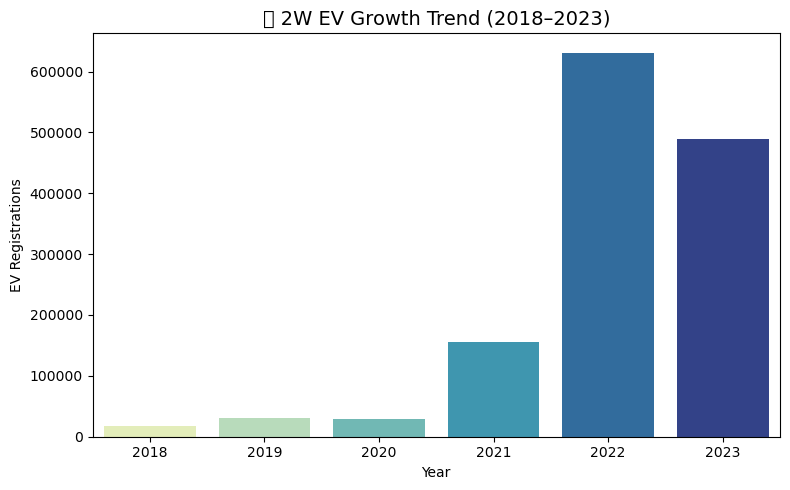

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(data=ev_2w_yearly, x="Year", y="EV Registrations", palette="YlGnBu")
plt.title("🛵 2W EV Growth Trend (2018–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("EV Registrations")
plt.tight_layout()
plt.show()

2.Compare 2W Share vs. Other EV Segments

In [14]:
# List of EV columns from all years
ev_columns = [
    "2018 - EV", "2019 - EV", "2020 - EV",
    "2021 - EV", "2022 - EV", "2023 (Till 01-08-2023) - EV"
]

# Sum across all EV years for each category
df["Total_EV_Sales"] = df[ev_columns].sum(axis=1)

# Select relevant columns
category_ev_share = df[["Vehicle Category", "Total_EV_Sales"]].copy()

# Sort for clarity
category_ev_share.sort_values(by="Total_EV_Sales", ascending=False, inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_29396\597640672.py:26: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


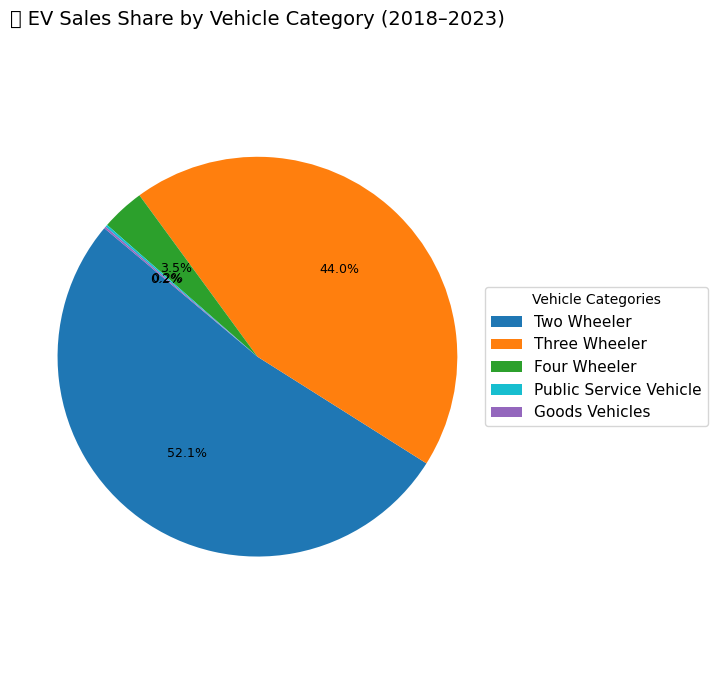

In [15]:
plt.figure(figsize=(7, 7))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#17becf", "#9467bd"]

# Create pie chart without labels on wedges
patches, texts, autotexts = plt.pie(
    category_ev_share["Total_EV_Sales"],
    autopct="%1.1f%%",
    colors=colors,
    startangle=140,
    textprops={'fontsize': 9}
)

# Move legend to the right side
plt.legend(
    patches,
    category_ev_share["Vehicle Category"],
    title="Vehicle Categories",
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
    fontsize=11
)

plt.title("🚗 EV Sales Share by Vehicle Category (2018–2023)", fontsize=14)
plt.axis("equal")
plt.tight_layout()
plt.show()


3.State Saturation Opportunity Analysis

In [16]:
import pandas as pd

# Load both datasets
ev_pct = pd.read_csv(r"D:\Internship\fynne lab\ev_motor\EV_Vehicle_Market_India\Data_Collection\vegicle_types\ev_registration_percentage_by_state.csv")
charging = pd.read_csv(r"D:\Internship\fynne lab\ev_motor\EV_Vehicle_Market_India\Data_Collection\vegicle_types\charging_stations_data.csv")

# Clean up column names
ev_pct["State/ UT"] = ev_pct["State/ UT"].str.strip()
charging["State"] = charging["State"].str.strip()

# Merge datasets
merged = pd.merge(ev_pct, charging, left_on="State/ UT", right_on="State", how="left")

# Calculate EVs per Charging Station
merged["EVs_per_Charging_Station"] = merged["Total EV"] / merged["Operational_Charging_Stations"]

# Identify opportunity states
opportunity = merged[
    (merged["% of Share of EV in Total Vehicles Sold"] < 2) &
    (merged["EVs_per_Charging_Station"] < 500)
].sort_values(by="EVs_per_Charging_Station")

# Display result
print("🔍 State Opportunity Zones for 2W EV Growth:")
display(opportunity[["State/ UT", "% of Share of EV in Total Vehicles Sold", "EVs_per_Charging_Station"]])


🔍 State Opportunity Zones for 2W EV Growth:


,State/ UT,% of Share of EV in Total Vehicles Sold,EVs_per_Charging_Station
32,Nagaland,0.02,4.500000
31,Arunachal Pradesh,0.03,4.666667
33,Lakshadweep,0.69,19.000000
26,Meghalaya,0.35,27.238095
24,Himachal Pradesh,0.48,69.159091
25,Manipur,0.76,74.882353
15,West Bengal,1.36,217.672956
12,Andhra Pradesh,1.85,270.746177
17,Jharkhand,1.86,351.111111
16,Punjab,1.90,357.335443


In [17]:
!pip install adjustText


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for adjustText from https://files.pythonhosted.org/packages/53/1c/8feedd607cc14c5df9aef74fe3af9a99bf660743b842a9b5b1865326b4aa/adjustText-1.3.0-py3-none-any.whl.metadata


C:\Users\ASUS\AppData\Local\Temp\ipykernel_29396\4261291876.py:29: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


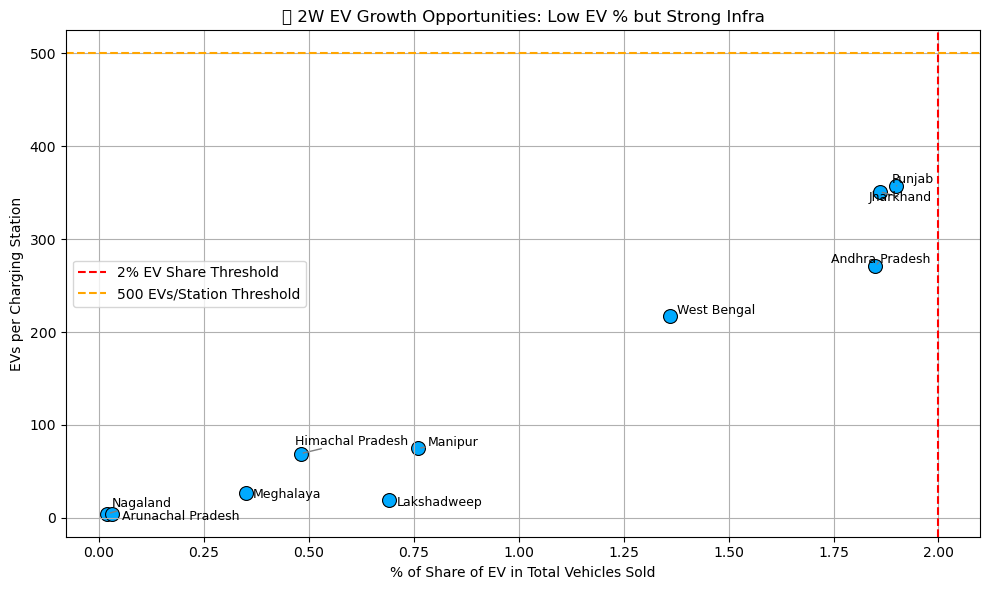

In [18]:
from adjustText import adjust_text

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=opportunity,
                          x="% of Share of EV in Total Vehicles Sold",
                          y="EVs_per_Charging_Station",
                          s=100, color="#00aaff", edgecolor="black")

# Collect text objects for better adjustment
texts = []
for i in range(opportunity.shape[0]):
    texts.append(plt.text(opportunity.iloc[i]["% of Share of EV in Total Vehicles Sold"],
                          opportunity.iloc[i]["EVs_per_Charging_Station"],
                          opportunity.iloc[i]["State/ UT"],
                          fontsize=9))

# Adjust labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

# Reference lines
plt.axvline(x=2, color='red', linestyle='--', label='2% EV Share Threshold')
plt.axhline(y=500, color='orange', linestyle='--', label='500 EVs/Station Threshold')

plt.title("📍 2W EV Growth Opportunities: Low EV % but Strong Infra")
plt.xlabel("% of Share of EV in Total Vehicles Sold")
plt.ylabel("EVs per Charging Station")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Key Criteria:
EV Share < 2%: Indicates low adoption.

EVs per Charging Station < 500: Indicates better charging infrastructure availability (less pressure on infra).

📍 Insights from the Chart:
Nagaland, Arunachal Pradesh, Lakshadweep, Meghalaya are underpenetrated but infra-ready — excellent zones for targeted awareness campaigns and incentives.

Himachal Pradesh, Manipur, West Bengal also show strong infra but underwhelming adoption.

These states can be prioritized by policymakers and OEMs to drive 2W EV penetration.